**Task04-Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/twitter_validation.csv')


In [ ]:
#Checking shape of the dataset
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  999
Columns:  4


In [ ]:
df.head(5)

,Tweet ID,Entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
#CHECKING NULL VALUES
df.isnull().sum()

Tweet ID         0
Entity           0
sentiment        0
Tweet content    0
dtype: int64

**DATA CLEANING**

In [ ]:
# Define the cleaning_URLs function to get rid of URLs in the tweet
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|([^s]+.com)|(https?://[^s]+))','',data)

# Apply the cleaning_URLsto the tweet column
df['Tweet content'] = df['Tweet content'].apply(cleaning_URLs)

In [ ]:
# Define the cleaning_numbers function to get rid of numbers in the tweet
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

# Apply the cleaning_numbers_udf to the clean_text column
df['Tweet content'] = df['Tweet content'].apply(cleaning_numbers)

In [ ]:
# Define the cleaning_punctation function
def cleaning_punctation(data):
    return re.sub('[^a-zA-Z#]+', ' ', data)

# Apply the cleaning_numbers_udf to the clean_text column
df['Tweet content'] = df['Tweet content'].apply(cleaning_punctation)

In [ ]:
#removing all emails in the text
pattern_to_remove = r'\S+@\S+'
# Use str.replace() to remove the pattern from the 'text_column'
df['Tweet content'] = df['Tweet content'].str.replace(pattern_to_remove, '', regex=True)

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Tweet content'] = df['Tweet content'].apply(remove_stopwords)

In [ ]:
df.head(5)

,Tweet ID,Entity,sentiment,Tweet content
0,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects claims...
1,8312,Microsoft,Negative,Microsoft pay WORD functions poorly SamsungUS ...
2,4371,CS-GO,Negative,CSGO matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,President slapping Americansmit unlawful act a...
4,6273,FIFA,Negative,Hi EAHelp Madeleine McCann cellar past years l...


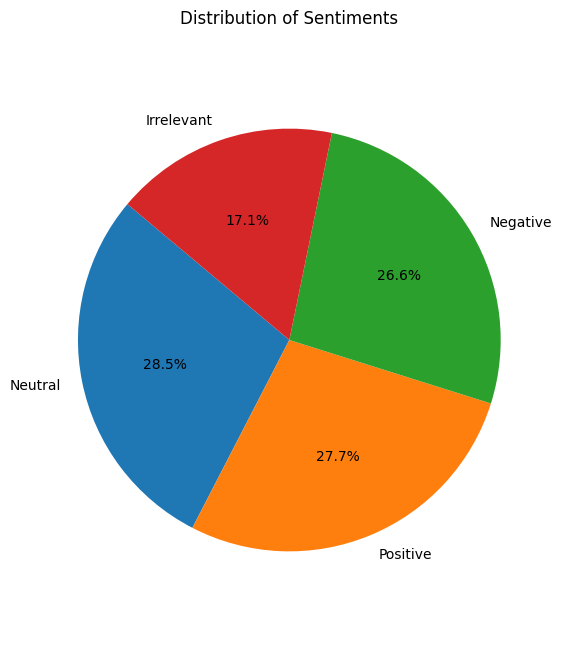

In [ ]:
#EXPLORATORY DATA ANALYSIS
#Pie Chart representation of sentiment distribution
# Count the occurrences of each category
category_counts = df['sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Distribution of Sentiments')
plt.show()

#There are 27.7% positive sentiment texts, 26.6% negative sentiment texts,
#17.1% Irrelevant sentiment texts and 28.5% neutral sentiment texts in the dataset

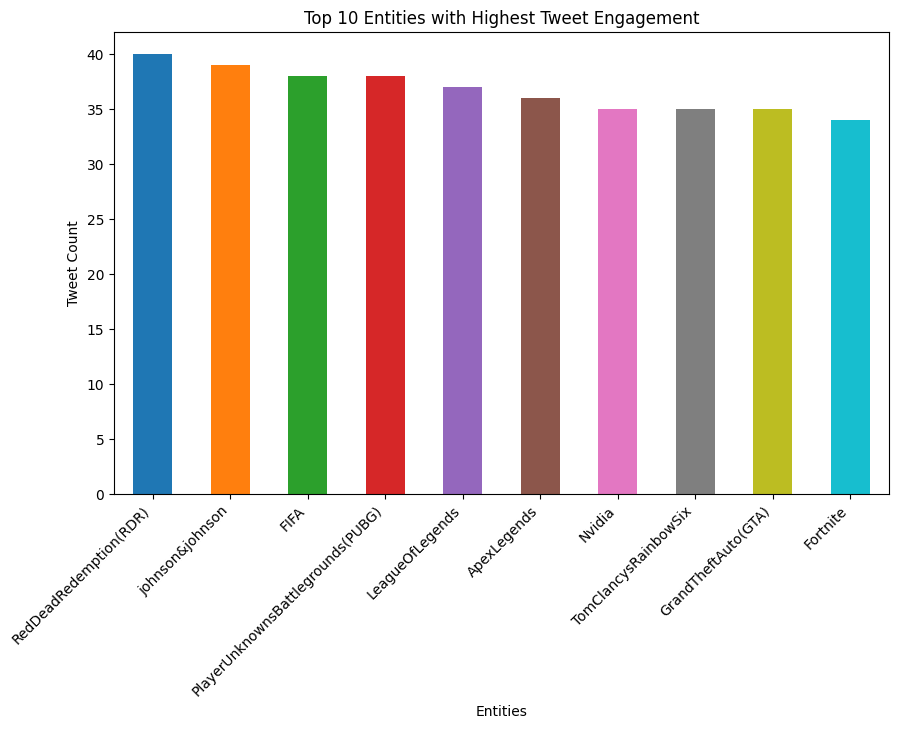

In [ ]:
# Bar Chart representation of top 10 most engaged entities on tweets
# Count the occurrences of each category
entity_counts = df['Entity'].value_counts()

# Select the top 10 categories
top_10_entity = entity_counts.head(10)

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot a bar graph for the top 10 categories with colors
plt.figure(figsize=(10, 6))
top_10_entity.plot(kind='bar', color=colors)

# Remove the annotate part to not show values on top of each bar

plt.xlabel("Entities")
plt.ylabel('Tweet Count')
plt.title('Top 10 Entities with Highest Tweet Engagement')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

#The highest tweet count is of RedDeadRedeemption entity which is 40, Lowest tweet count is of Fortnite.


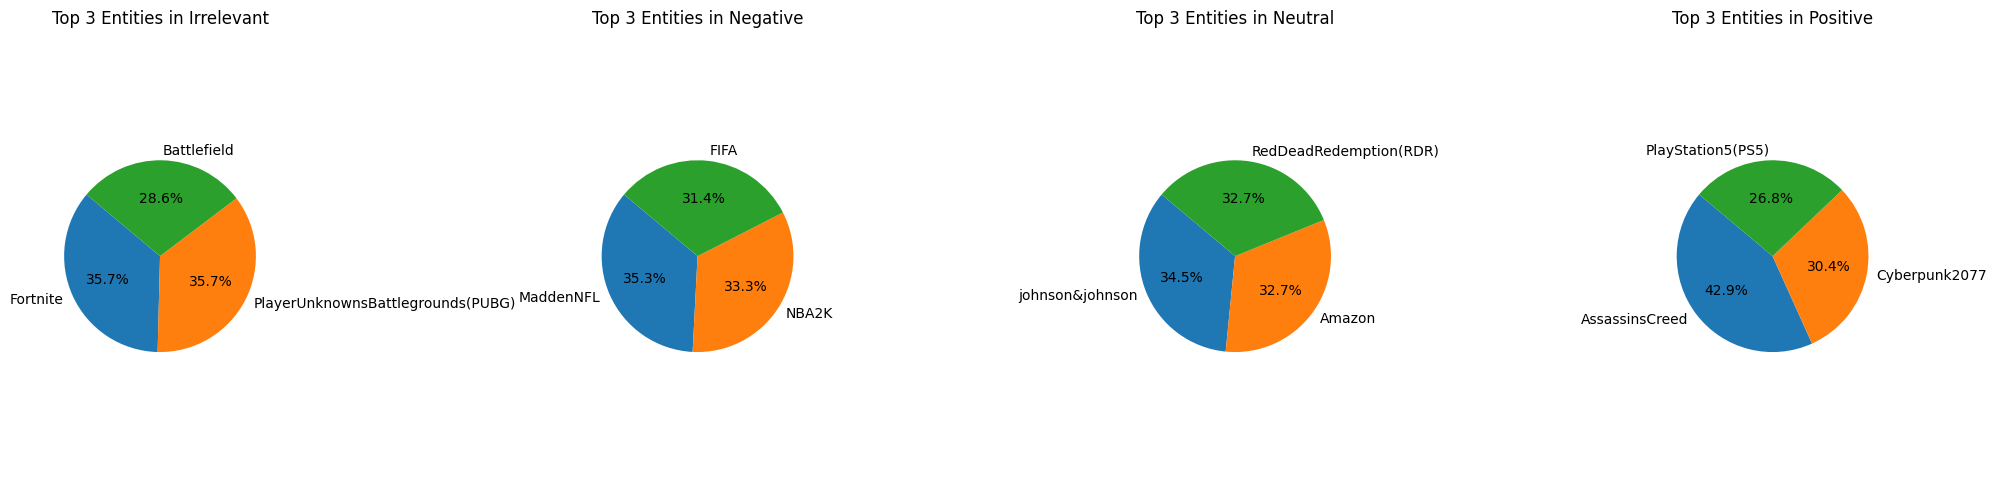

In [ ]:
# Pie chart representation of the top three entities in each sentiment category
# Group the data by 'tweet_category' and 'entity' and count occurrences
category_entity_counts = df.groupby(['sentiment', 'Entity']).size().unstack(fill_value=0)

# Create a list to store the top 3 entities for each category
top_three_entities = []

# Iterate through each category
for category in category_entity_counts.index:
    top_entities = category_entity_counts.loc[category].nlargest(3)
    top_three_entities.append(top_entities)

# Determine the number of subplots based on the number of categories
num_categories = len(category_entity_counts.index)

# Create subplots for each category
plt.figure(figsize=(5 * num_categories, 5))
for i, (category, top_entities) in enumerate(zip(category_entity_counts.index, top_three_entities), start=1):
    plt.subplot(1, num_categories, i)
    plt.pie(top_entities, labels=top_entities.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Top 3 Entities in {category}')

plt.tight_layout()
plt.show()


Number of unique words: 997


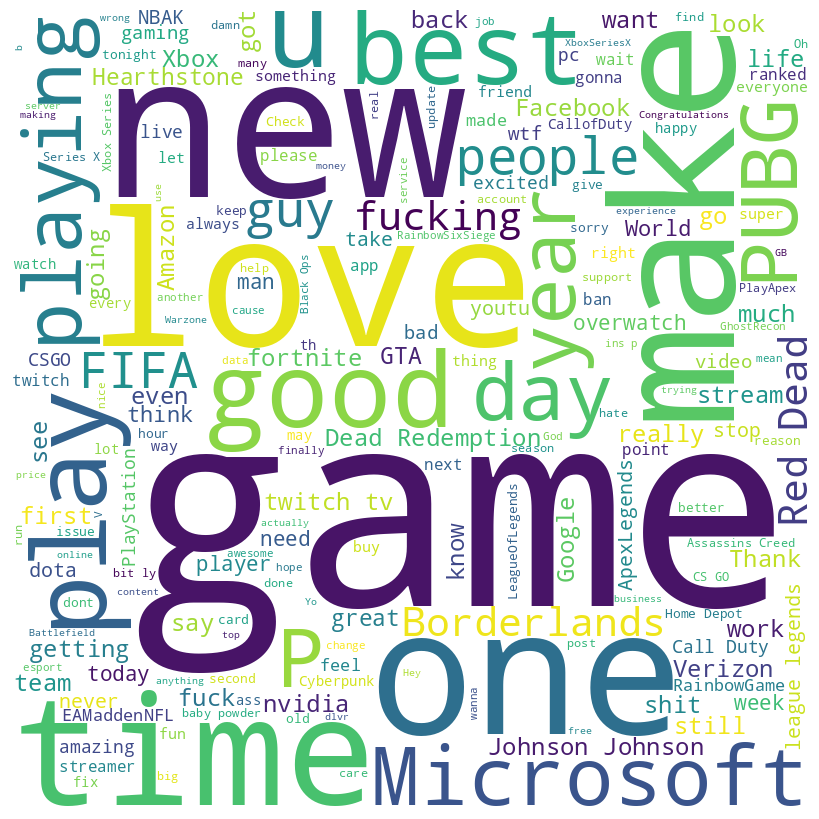

In [ ]:
# to find how many unique words in the vocabulary
unique_words_count = df['Tweet content'].nunique()
print("Number of unique words:", unique_words_count)

# Extract text data from the 'text_column'
text_data = df['Tweet content'].astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

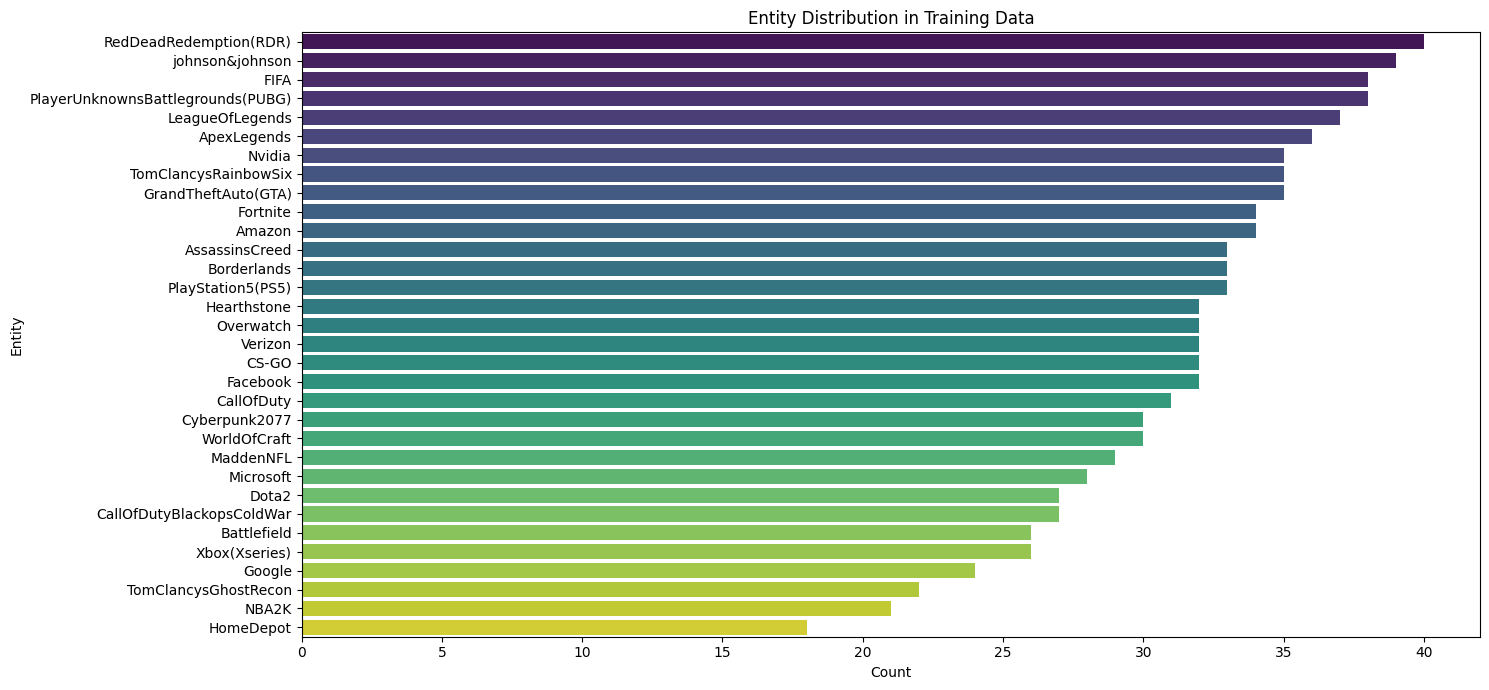

In [ ]:
# Set up the plot
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=df, y=df.columns[1], order=df[df.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

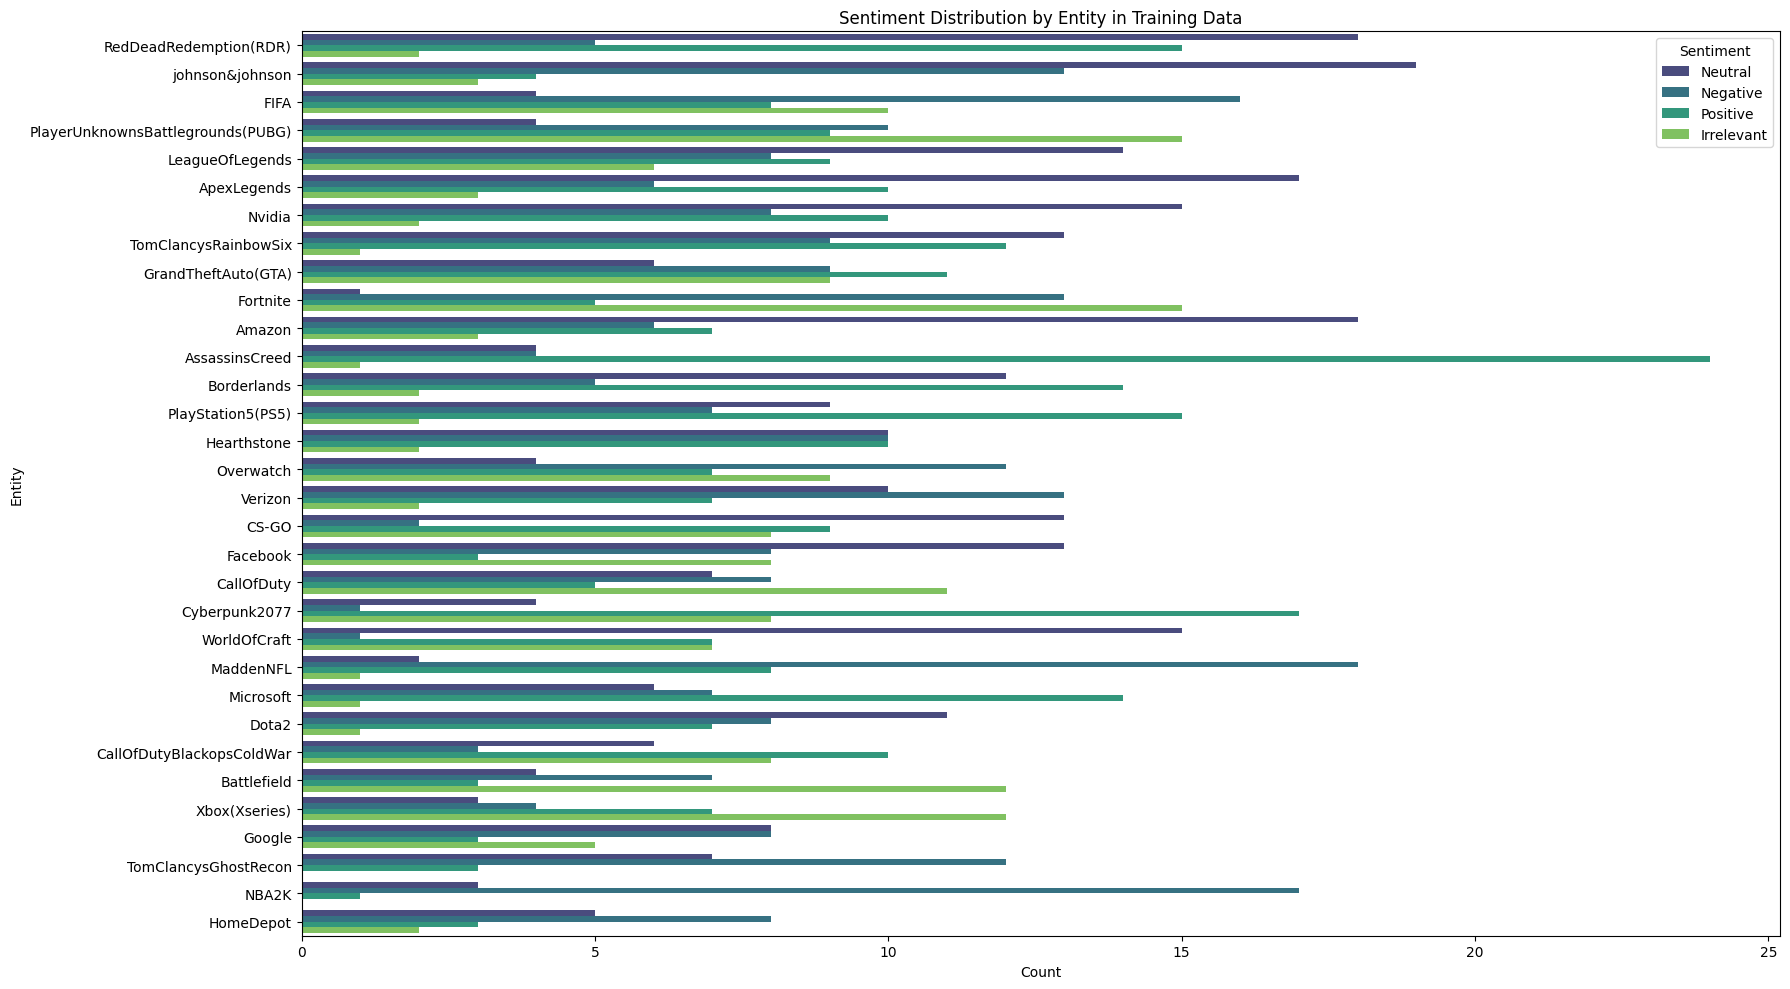

In [ ]:
# Set up the plot
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=df, y=df.columns[1], hue=df.columns[2], order=df[df.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [ ]:
# Sentiment Analysis using NLTK VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['SentimentScore'] = df['Tweet content'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment'] = df['SentimentScore'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,Tweet ID,Entity,sentiment,Tweet content,SentimentScore
0,352,Amazon,neutral,BBC News Amazon boss Jeff Bezos rejects claims...,-0.0000
1,8312,Microsoft,negative,Microsoft pay WORD functions poorly SamsungUS ...,-0.1027
2,4371,CS-GO,negative,CSGO matchmaking full closet hacking truly awf...,-0.0258
3,4433,Google,neutral,President slapping Americansmit unlawful act a...,0.0000
4,6273,FIFA,positive,Hi EAHelp Madeleine McCann cellar past years l...,0.7178


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(df['Tweet content'])

In [ ]:
#SPLITTING THE DATA , MODEL BUILDING AND PREDCITIONS
#spliting the cleaned data into test and train
X_train, X_test, y_train, y_test = train_test_split(bow, df['sentiment'], test_size=0.2, random_state=69)

In [ ]:
from sklearn.linear_model import LogisticRegression
#using naive bayes model to make predicitons
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 2 2 0 2 0 2 2 2 1 2 2 0 2 1 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 0 2 1 0 2
 0 2 0 0 2 1 2 2 0 0 2 2 1 2 0 1 2 0 2 0 2 0 2 0 2 2 1 0 0 0 2 2 0 2 2 0 2
 2 1 2 2 2 2 0 2 2 2 0 0 2 2 2 0 2 0 2 1 2 2 2 2 0 2 2 0 0 0 2 0 0 0 0 0 2
 0 0 1 0 1 0 2 0 1 2 0 2 2 0 2 2 2 0 2 2 0 2 2 1 2 0 0 2 2 0 0 1 2 2 0 0 2
 2 2 2 2 0 2 2 1 2 1 2 0 2 0 2 0 2 2 2 0 2 1 2 2 2 2 2 0 2 0 0 2 0 2 2 0 1
 0 2 2 2 0 0 2 2 2 2 1 0 2 0 1]


In [ ]:
AccuracyScore= accuracy_score(y_test, y_pred)
print("Accuracy Score is:",AccuracyScore)


Accuracy Score is: 0.675


Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        70
           1       0.60      0.46      0.52        26
           2       0.73      0.77      0.75       104

    accuracy                           0.68       200
   macro avg       0.65      0.62      0.63       200
weighted avg       0.67      0.68      0.67       200



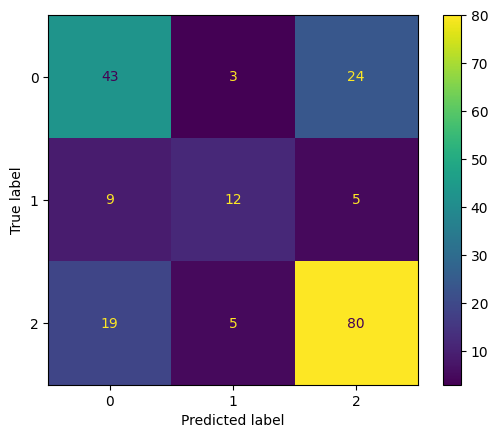

In [ ]:
def eval(name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Logistic Regression: \n')
    print(classification_report(y_test, y_pred))
    t1.plot()
eval("Classification Report", y_test, y_pred)

In [ ]:
#Naive Bayes

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred = model.predict(X_test)
AccuracyScore=accuracy_score(y_test, pred)
print("Accuracy score is:", AccuracyScore)

Accuracy score is: 0.57


Classification Report for Naive Bayes: 

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        70
           1       0.23      0.19      0.21        26
           2       0.68      0.66      0.67       104

    accuracy                           0.57       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.57      0.57      0.57       200



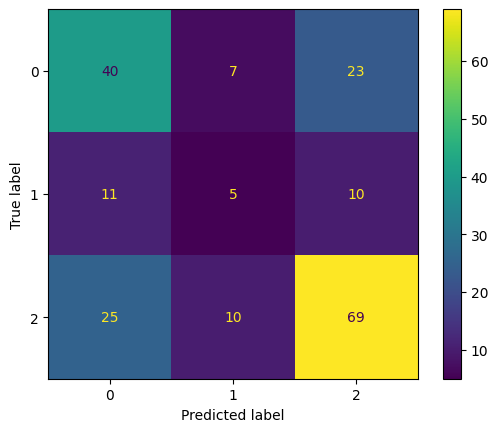

In [ ]:
def eval(name, y_test, pred):
    cm = confusion_matrix(y_test, pred)
    t1 = ConfusionMatrixDisplay(cm)
    print('Classification Report for Naive Bayes: \n')
    print(classification_report(y_test, pred))
    t1.plot()
eval("Classification Report", y_test, pred)

**From above two machine learning models, we got to know that logistic regression gives high accuracy as compared to naive bayes. So, we'll use logistic regression for our model building.**